# Import libraries

In [4]:
%pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import mplfinance as mpf

# Read the Data Set

In [7]:
path = ''
df = pd.read_csv(path + 'GOOG.csv')

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
1,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
3,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
4,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401


In [9]:
# Rename columns
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume']

In [10]:
# Convert date to datetime type
df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'], format='%Y/%m/%d')

<ipython-input-10-48fcdae6da87>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'], format='%Y/%m/%d')


# Data Exploration


In [11]:
df.head()

,Date,Open,High,Low,Close,AdjClose,Volume
0,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
1,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
3,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
4,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401


In [12]:
df.shape

(4902, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4902 entries, 0 to 4901
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4902 non-null   datetime64[ns]
 1   Open      4902 non-null   float64       
 2   High      4902 non-null   float64       
 3   Low       4902 non-null   float64       
 4   Close     4902 non-null   float64       
 5   AdjClose  4902 non-null   float64       
 6   Volume    4902 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 268.2 KB


In [14]:
df.describe()

,Open,High,Low,Close,AdjClose,Volume
count,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000,4.902000e+03
mean,42.410002,42.859646,41.983137,42.430391,42.430391,1.178735e+08
std,39.600255,40.050607,39.203556,39.634838,39.634838,1.504320e+08
min,2.470490,2.534002,2.464263,2.490913,2.490913,1.584340e+05
25%,12.875863,13.003323,12.765465,12.893609,12.893609,2.821550e+07
50%,26.670134,26.880774,26.437625,26.666893,26.666893,5.969846e+07
75%,58.384750,58.859625,57.859186,58.400250,58.400250,1.459169e+08
max,154.009995,155.199997,152.919998,154.839996,154.839996,1.650833e+09


In [15]:
# Check data range
earliest_date = date_time = min(df['Date'])
latest_date = date_time = max(df['Date'])
print('Date range of stock data:\t', earliest_date, '-', latest_date)

Date range of stock data:	 2004-08-20 00:00:00 - 2024-02-09 00:00:00


In [16]:
# Check for missing values
df.isna().sum()

Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64

In [17]:
# Check for duplicates
df[['Date']].duplicated().sum()

0

# Data Normalization

For each stock, normalize the values based on the stock's min and max. (or based on the min and max for all the data?)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# Normalize
# Use standardscaler instead of minmaxscaler since there's no min/max to stock prices
standard_scaler = StandardScaler()
cols_scale = ['Open', 'High', 'Low', 'AdjClose', 'Volume']
X, y = df[cols_scale], df['Close']
X_scaled = standard_scaler.fit_transform(X)
# TODO: move the data back into the dataframe (nvm - we're each using our own notebooks)

# Visualize Data

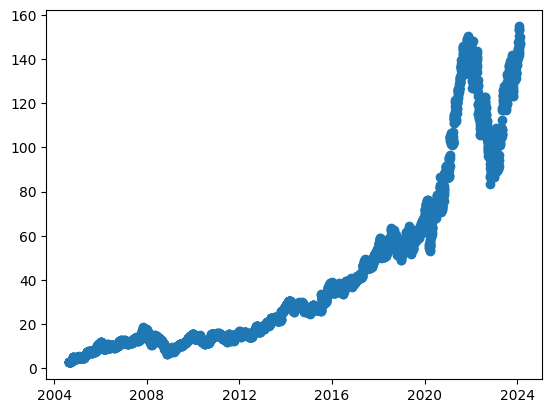

In [20]:
# Graph one open/close price for one stock (as an example)
plt.scatter(x='Date', y='Close', data=df)

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


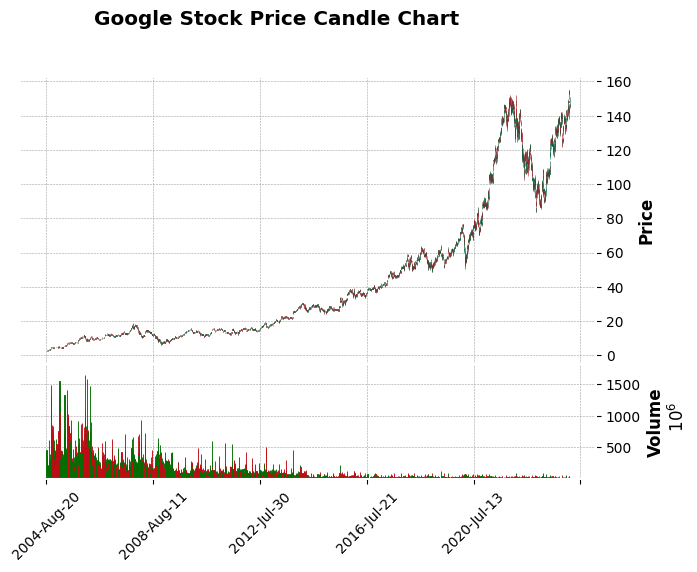

In [29]:
#candlestick plot
# green and red show whether price has gone down or up in a day between open and close
df_cpy = pd.read_csv(path + 'GOOG.csv')
df_cpy['Date'] = pd.to_datetime(df_cpy['Date'])
df_cpy.set_index('Date', inplace=True)

mpf.plot(df_cpy, type = "candle", volume = True, style = "charles", title = "Google Stock Price Candle Chart", ylabel = "Price", ylabel_lower = "Volume")


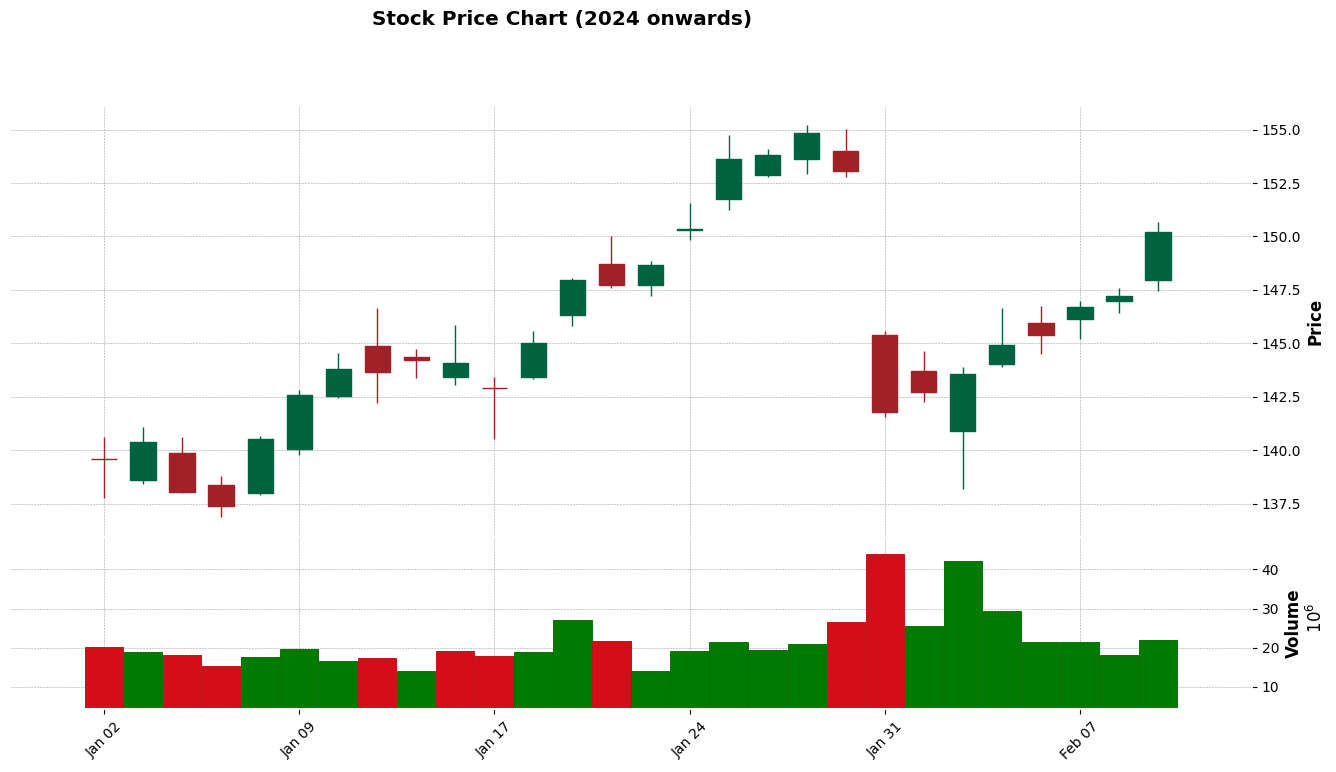

In [31]:
#2024 candlestick


df_2024_onwards = df_cpy[df.index >= pd.to_datetime('2024-01-01')]

# Plot candlestick chart
mpf.plot(df_2024_onwards, type='candle', volume=True, style='charles', title='Stock Price Chart (2024 onwards)',
         ylabel='Price', ylabel_lower='Volume', figratio=(12, 6), figscale=1.5)


In [ ]:
# Pairplot
sns.pairplot(data=df, vars=['Date', 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume'])

In [32]:
correlation_matrix = df_cpy.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Summary statistics
summary_stats = df.describe()
print("\nSummary Statistics:")
print(summary_stats)

Correlation Matrix:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999906  0.999899  0.999782   0.999782 -0.471797
High       0.999906  1.000000  0.999879  0.999898   0.999898 -0.470857
Low        0.999899  0.999879  1.000000  0.999906   0.999906 -0.472976
Close      0.999782  0.999898  0.999906  1.000000   1.000000 -0.472023
Adj Close  0.999782  0.999898  0.999906  1.000000   1.000000 -0.472023
Volume    -0.471797 -0.470857 -0.472976 -0.472023  -0.472023  1.000000

Summary Statistics:
              Open         High          Low        Close     AdjClose  \
count  4902.000000  4902.000000  4902.000000  4902.000000  4902.000000   
mean     42.410002    42.859646    41.983137    42.430391    42.430391   
std      39.600255    40.050607    39.203556    39.634838    39.634838   
min       2.470490     2.534002     2.464263     2.490913     2.490913   
25%      12.875863    13.003323    12.765465    12.893609    12.893609   
50%      26.670134